<a href="https://colab.research.google.com/github/saerarawas/AAI614_rawas/blob/main/Week%206/Notebook6_1_Rawas_Saera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 6.1: Classification vs Clustering*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%206/Notebook6.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: This notebook contains excerpts from *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurélien Géron*

Define the default font sizes to make the figures prettier:

In [41]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Classification vs Clustering

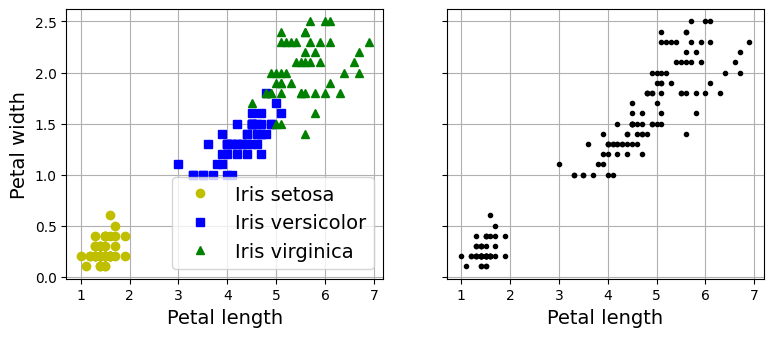

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

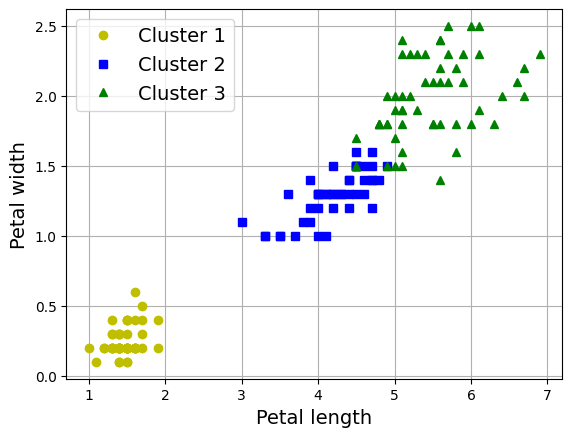

In [43]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

What's the ratio of iris plants we assigned to the right cluster?

In [44]:
(y_pred==y).sum() / len(y_pred)

0.9666666666666667

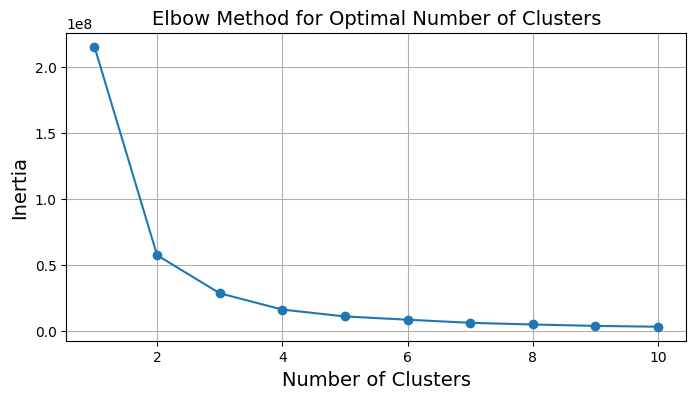

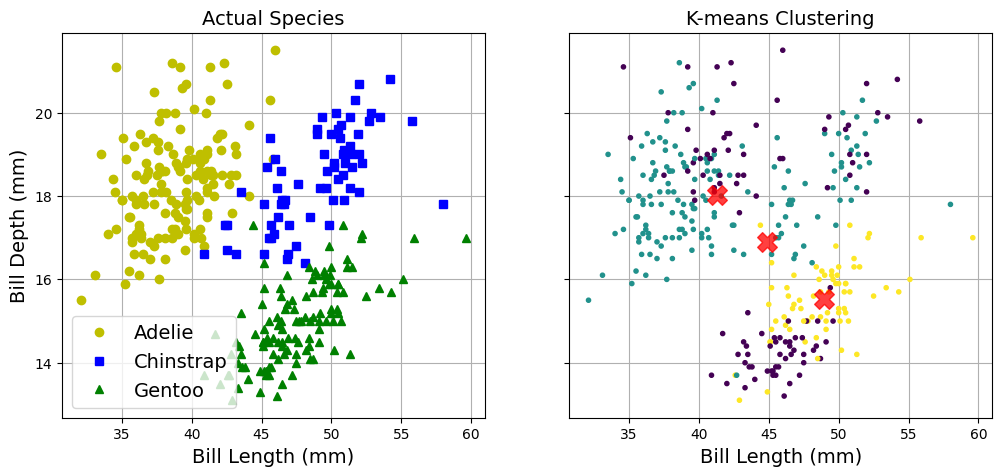

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins.dropna(inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
penguins['species'] = label_encoder.fit_transform(penguins['species'])

# Features and labels
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

# Apply K-means clustering with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting actual species
plt.figure(figsize=(12, 5))

# Subplot for actual species
plt.subplot(121)
species_unique = penguins['species'].unique()
colors = ['yo', 'bs', 'g^']
for i, species in enumerate(species_unique):
    plt.plot(X.values[y == species, 0], X.values[y == species, 1], colors[i], label=label_encoder.inverse_transform([species])[0])
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Actual Species")
plt.grid()
plt.legend()

# Subplot for K-means clustering results
plt.subplot(122)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y_kmeans, cmap='viridis', marker=".")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel("Bill Length (mm)")
plt.tick_params(labelleft=False)
plt.title("K-means Clustering")
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()


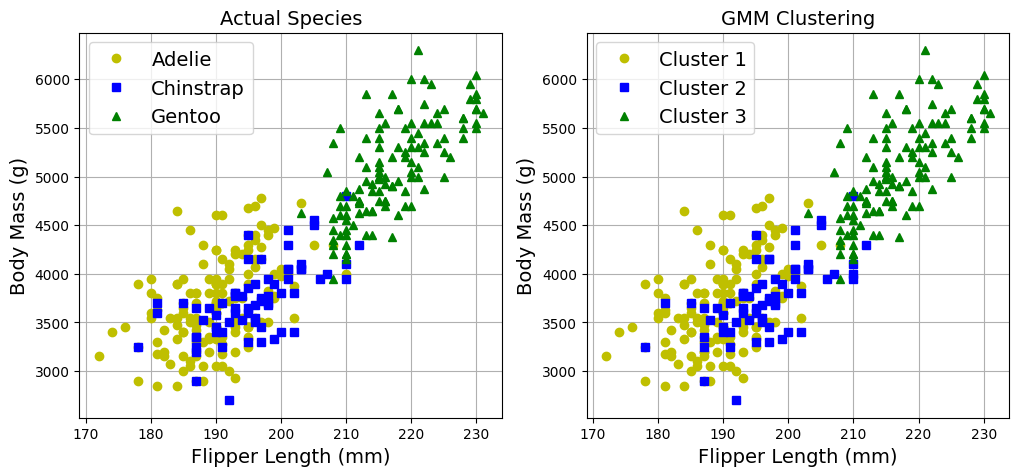

In [46]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins.dropna(inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
penguins['species'] = label_encoder.fit_transform(penguins['species'])

# Features and labels
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = penguins['species'].values

# Apply Gaussian Mixture Model clustering with optimal parameters
gmm = GaussianMixture(n_components=3, init_params='kmeans', max_iter=300, random_state=42)
y_pred = gmm.fit(X).predict(X)

# Map predicted clusters to actual species labels
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y == class_id])

    # Check if mode is an array before indexing
    if isinstance(mode, np.ndarray) and mode.size > 0:
        mapping[mode[0]] = class_id
    else:
        # Handle the case where mode is a scalar
        mapping[mode] = class_id # Assign the scalar value directly

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

# Plotting the GMM Clusters
plt.figure(figsize=(12, 5))

# Actual Species Plot
plt.subplot(121)
species_unique = penguins['species'].unique()
colors = ['yo', 'bs', 'g^']
for i, species in enumerate(species_unique):
    plt.plot(X[y == species, 2], X[y == species, 3], colors[i], label=label_encoder.inverse_transform([species])[0])
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Actual Species")
plt.grid()
plt.legend(loc="upper left")

# GMM Clustering Plot
plt.subplot(122)
colors = ['yo', 'bs', 'g^']
for i in range(3):  # Since we have 3 components
    plt.plot(X[y_pred == i, 2], X[y_pred == i, 3], colors[i], label=f"Cluster {i+1}")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(loc="upper left")
plt.title("GMM Clustering")
plt.grid()

plt.show()


In [47]:
(y_pred==y).sum() / len(y_pred)

0.984984984984985